Tugas Fuzzy Inference System (Bani Sabili Z - 221011402341 - 05TPLM008)

![Sample Image](https://github.com/banisabili/Tugas20_BaniSabiliZ_221011402341_05TPLM008/blob/main/images/Slide2.PNG)

<img src="Slide3.PNG"/>

<img src="Slide4.PNG"/>

<img src="Slide5.PNG"/>

<img src="Slide6.PNG"/>

<img src="Slide7.PNG"/>

<img src="Slide8.PNG"/>

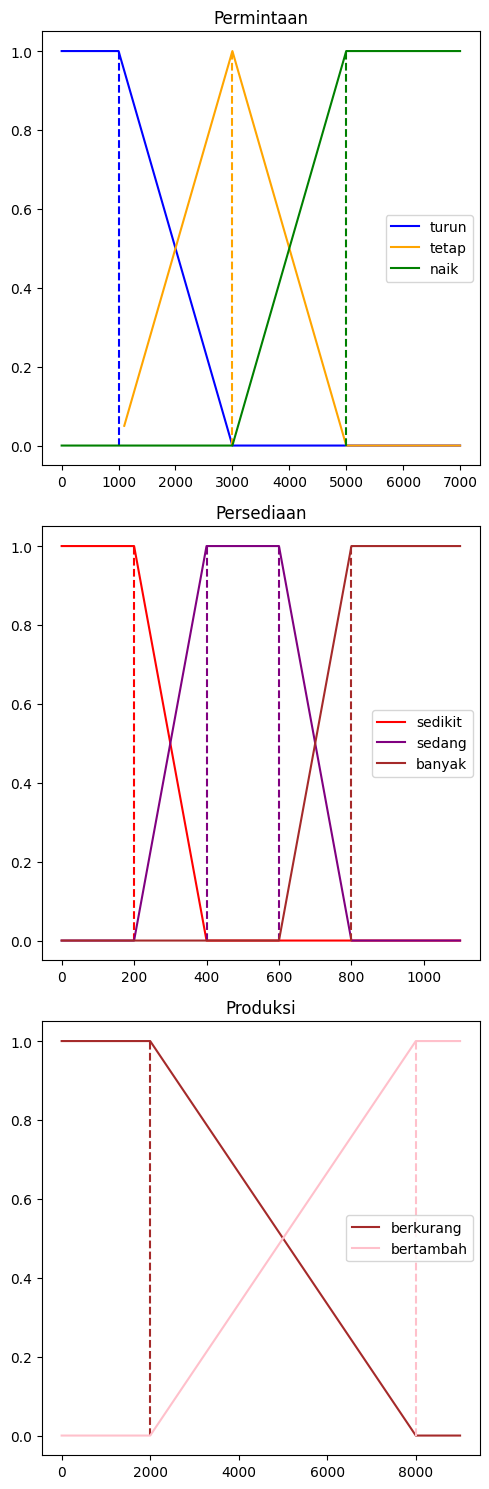

In [9]:
import matplotlib.pyplot as plt

class Demand():

    def __init__(self):
        self.min = 1000
        self.max = 5000
        self.s = 3000

    def decrease(self, x):
        if x <= self.min:
            return 1
        
        if self.min < x <= self.s:
            return (self.s - x) / 2000

        if x >= self.s:
            return 0

    
    def steady_demand(self, x):
        if self.min < x <= self.s:
            return (x - self.min) / 2000
        
        if self.s < x <=  self.max:
            return (self.max - x) / 2000
        
        if x >= self.max:
            return 0

    def increase(self, x):
        if x <= self.s:
            return 0
        
        if self.s <  x <= self.max:
            return (x - self.s) / 2000

        if x >= self.max:
            return 1
            

class Stock():

    def __init__(self):
        self.min = 200
        self.s_low = 400
        self.s_high = 600
        self.max = 800

    def a_few(self, x):
        if x <= self.min:
            return 1
        elif self.min < x <= self.s_low:
            return (self.s_low - x)/self.min
        else:
            return 0
    
    def a_steady(self, x):
        if self.min < x <= self.s_low:
            return (x - self.min) / self.min
        elif self.s_low < x <= self.s_high:
            return 1
        elif self.s_high < x <= self.max:
            return (self.max - x) / self.min 
        else:
            return 0

    def a_lot(self, x):
        if x <= self.s_high:
            return 0
        elif self.s_high < x <= self.max:
            return  (x - self.s_high) / self.min
        else:
            return 1
            
       

class Production():

    def __init__(self):
        self.min = 2000
        self.steady = 6000
        self.max = 8000

    def reduce(self, x):
        if x <= self.min:
            return 1
        
        if self.min < x <= self.max:
            return ( self.max - x) / self.steady
        
        if x >= self.max:
            return 0

    def add(self, x):
        if x <= self.min:
            return 0
        
        if self.min < x <= 8000:
            return (x - self.min) / self.steady
        
        if x >= self.max:
            return 1

demand = Demand()
stock = Stock()
prod = Production()

# Range grafik
x_permintaan = range(0, 7001, 100)
x_persediaan = range(0, 1101, 50)
x_produksi = range(0, 9001, 500)

y_permintaan_turun = [demand.decrease(i) for i in x_permintaan]
y_permintaan_tetap = [demand.steady_demand(i) for i in x_permintaan]
y_permintaan_naik = [demand.increase(i) for i in x_permintaan]

y_persediaan_sedikit = [stock.a_few(i) for i in x_persediaan]
y_persediaan_sedang = [stock.a_steady(i) for i in x_persediaan]
y_persediaan_banyak = [stock.a_lot(i) for i in x_persediaan]

y_produksi_berkurang = [prod.reduce(i) for i in x_produksi]
y_produksi_bertambah = [prod.add(i) for i in x_produksi]

# subplots
fig, axes = plt.subplots(3, 1, figsize=(5, 15))

# Grafik Permintaan
axes[0].plot(x_permintaan, y_permintaan_turun, label='turun', color='blue', linestyle='solid')
axes[0].vlines(1000, 0, 1, colors='blue', linestyles='dashed')
axes[0].plot(x_permintaan, y_permintaan_tetap, label='tetap', color='orange', linestyle='solid')
axes[0].vlines(3000, 0, 1, colors='orange', linestyles='dashed')
axes[0].plot(x_permintaan, y_permintaan_naik, label='naik', color='green', linestyle='solid')
axes[0].vlines(5000, 0, 1, colors='green', linestyles='dashed')
axes[0].set_title('Permintaan')
axes[0].legend()

# Grafik Persediaan
axes[1].plot(x_persediaan, y_persediaan_sedikit, label='sedikit', color='red', linestyle='solid')
axes[1].vlines(200, 0, 1, colors='red', linestyles='dashed')
axes[1].plot(x_persediaan, y_persediaan_sedang, label='sedang', color='purple', linestyle='solid')
axes[1].vlines(400, 0, 1, colors='purple', linestyles='dashed')
axes[1].vlines(600, 0, 1, colors='purple', linestyles='dashed')
axes[1].plot(x_persediaan, y_persediaan_banyak, label='banyak', color='brown', linestyle='solid')
axes[1].vlines(800, 0, 1, colors='brown', linestyles='dashed')
axes[1].set_title('Persediaan')
axes[1].legend()

# Grafik Produksi
axes[2].plot(x_produksi, y_produksi_berkurang, label='berkurang', color='brown', linestyle='solid')
axes[2].vlines(2000, 0, 1, colors='brown', linestyles='dashed')
axes[2].plot(x_produksi, y_produksi_bertambah, label='bertambah', color='pink', linestyle='solid')
axes[2].vlines(8000, 0, 1, colors='pink', linestyles='dashed')
axes[2].set_title('Produksi')
axes[2].legend()

# grid
for ax in axes:
    ax.grid(False)

# Tampilan grafik
plt.tight_layout()
plt.show()